In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/home/mk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
demand = 'Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv'
demand_df = pd.read_csv(demand)

In [3]:
demand_df['datetime'] = pd.to_datetime(demand_df['datetime'], format='%m/%d/%Y %H:%M')

In [4]:
demand_df.head()

,datetime,Demand (MW)
0,2020-01-01 00:00:00,445.8
1,2020-01-01 01:00:00,424.5
2,2020-01-01 02:00:00,423.5
3,2020-01-01 03:00:00,418.8
4,2020-01-01 04:00:00,414.8


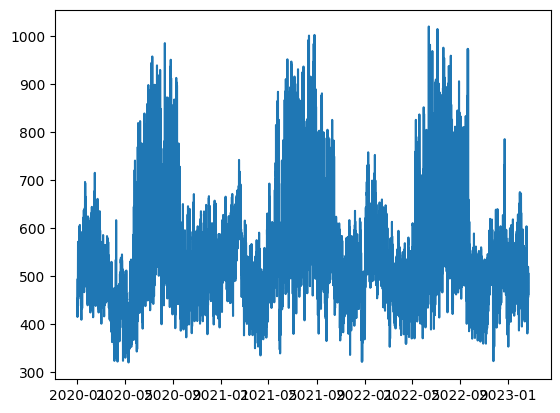

In [5]:
#One shot plot:
plt.plot(demand_df['datetime'], demand_df['Demand (MW)'])

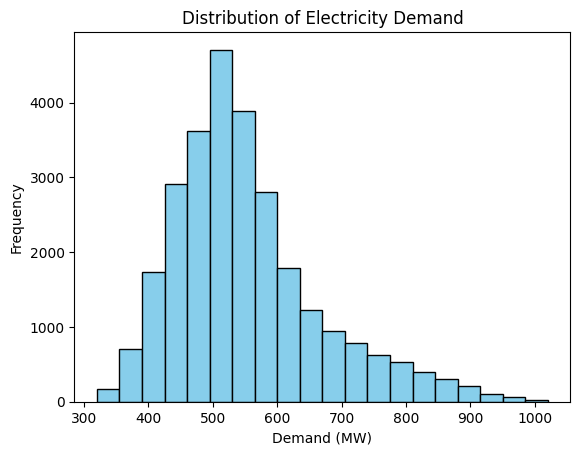

In [6]:
demand_values = demand_df['Demand (MW)']

# Plotting the histogram
plt.hist(demand_values, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Electricity Demand')
plt.xlabel('Demand (MW)')
plt.ylabel('Frequency')
plt.show()

In [7]:
demand_df['Demand (MW)'].describe()

count    27552.000000
mean       551.828931
std        114.429464
min        320.000000
25%        474.575000
50%        529.550000
75%        601.925000
max       1020.200000
Name: Demand (MW), dtype: float64

In [8]:
demand_df.head()

,datetime,Demand (MW)
0,2020-01-01 00:00:00,445.8
1,2020-01-01 01:00:00,424.5
2,2020-01-01 02:00:00,423.5
3,2020-01-01 03:00:00,418.8
4,2020-01-01 04:00:00,414.8


<Axes: >

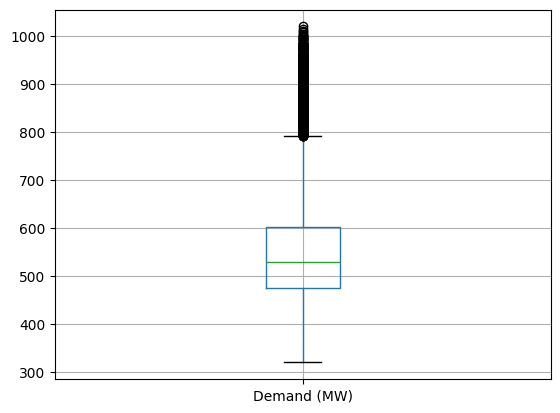

In [9]:
demand_df[['Demand (MW)']].boxplot()

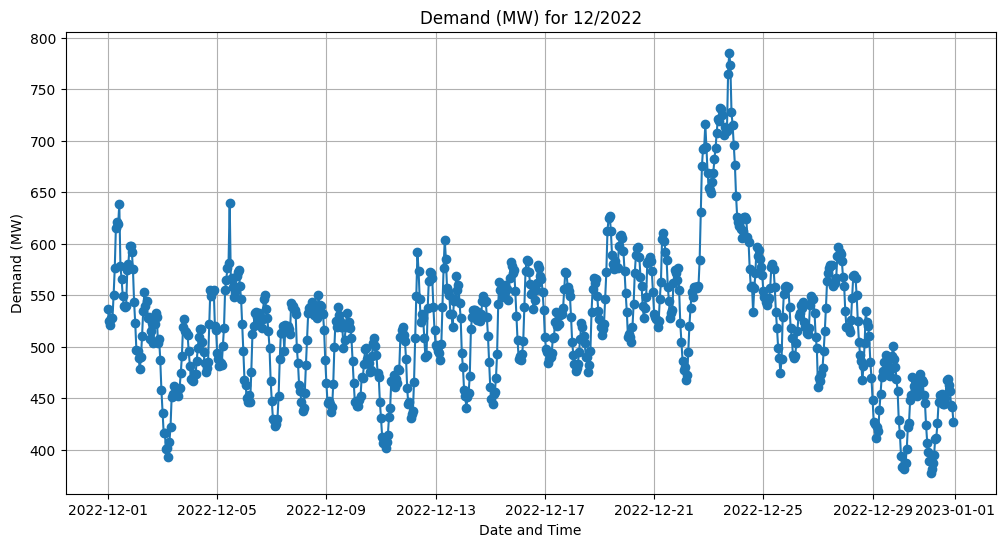

In [10]:
def plot_monthly_demand(target_month, target_year, df=demand_df):
    # Filter data for the target month and year
    target_data = df[(df['datetime'].dt.month == target_month) & (df['datetime'].dt.year == target_year)]

    # Plotting the time series graph
    plt.figure(figsize=(12, 6))
    plt.plot(target_data['datetime'], target_data['Demand (MW)'], marker='o', linestyle='-')
    plt.title(f'Demand (MW) for {target_month}/{target_year}')
    plt.xlabel('Date and Time')
    plt.ylabel('Demand (MW)')
    plt.grid(True)
    plt.show()

# Example usage:
target_month = 12
target_year = 2022
plot_monthly_demand(target_month, target_year)

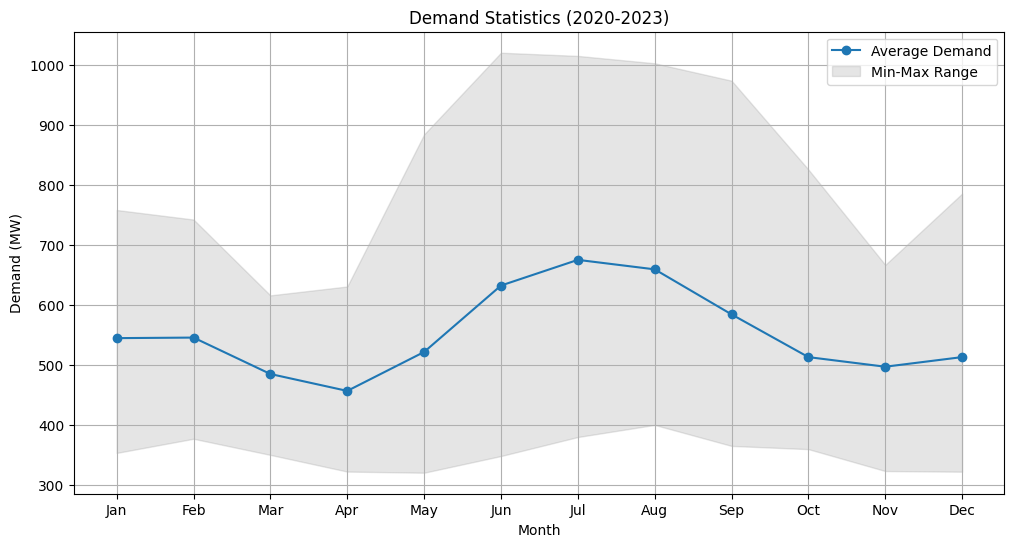

In [11]:
def plot_demand_statistics(start_year, end_year, df=demand_df):
    # Filter data for the specified range of years
    filtered_data = df[(df['datetime'].dt.year >= start_year) & (df['datetime'].dt.year <= end_year)]

    # Extract month and year from datetime
    filtered_data['Month'] = filtered_data['datetime'].dt.month

    # Calculate minimum, maximum, and average demand per month
    demand_stats = filtered_data.groupby('Month')['Demand (MW)'].agg(['min', 'max', 'mean']).reset_index()

    # Plotting the demand statistics
    plt.figure(figsize=(12, 6))
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    plt.plot(months, demand_stats['mean'], label='Average Demand', marker='o', linestyle='-')
    plt.fill_between(months, demand_stats['min'], demand_stats['max'], color='gray', alpha=0.2, label='Min-Max Range')

    plt.title(f'Demand Statistics ({start_year}-{end_year})')
    plt.xlabel('Month')
    plt.ylabel('Demand (MW)')
    plt.legend()
    plt.grid(True)
    plt.show()

start_year = 2020
end_year = 2023
plot_demand_statistics(start_year, end_year)

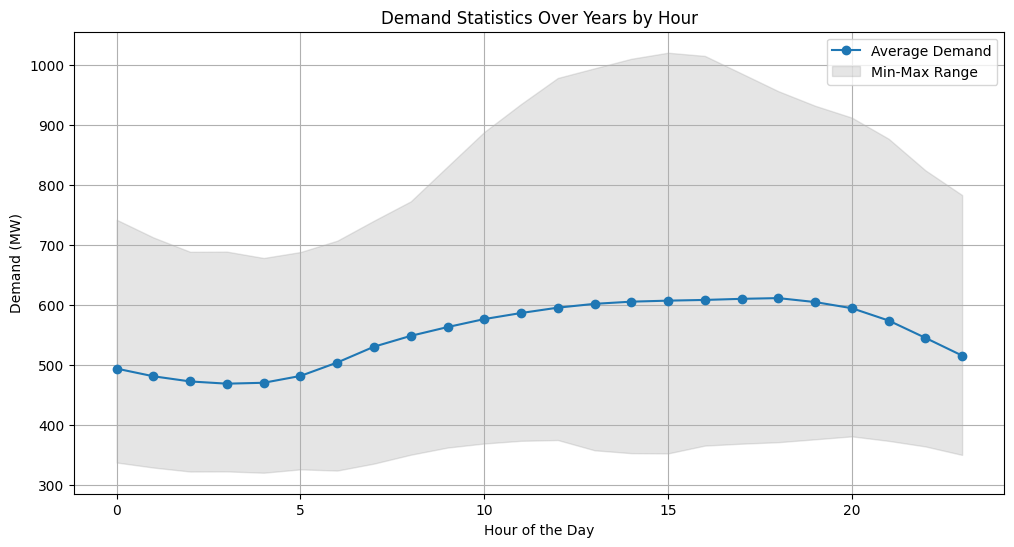

In [12]:
def plot_hourly_demand_statistics(df=demand_df):
    # Extract hour from datetime
    df['Hour'] = df['datetime'].dt.hour

    # Calculate demand statistics per hour over the years
    hourly_demand_stats = df.groupby('Hour')['Demand (MW)'].agg(['min', 'max', 'mean'])

    # Plotting the demand statistics over the years
    plt.figure(figsize=(12, 6))
    hours = range(24)

    df.drop('Hour', axis=1, inplace=True)

    plt.plot(hours, hourly_demand_stats['mean'], label='Average Demand', marker='o', linestyle='-')
    plt.fill_between(hours, hourly_demand_stats['min'], hourly_demand_stats['max'], color='gray', alpha=0.2, label='Min-Max Range')

    plt.title(f'Demand Statistics Over Years by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Demand (MW)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_hourly_demand_statistics()

# Combine weather and demand DataFrame:

In [12]:
weather = 'Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv'
weather_df = pd.read_csv(weather)

In [20]:
weather_df = weather_df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [13]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%m/%d/%Y %H:%M')

In [14]:
# Take NaN of preciptype as normal conditions:
weather_df['preciptype'].fillna('normal', inplace=True) 

# Only 18 rows have no snow, so linear interpolation is fine:
weather_df['snow'].interpolate(method='linear', inplace=True) 
weather_df['snowdepth'].interpolate(method='linear', inplace=True) 

# Sea pressure also has 18 missing values:
weather_df['sealevelpressure'].interpolate(method='linear', inplace=True) 

# Visibility also has 18 missing values so linear is fine:
weather_df['visibility'].interpolate(method='linear', inplace=True)

In [15]:
# Windgust values are better suited for spline interpolation:
weather_df['windgust'].interpolate(method='spline', order=3, inplace=True) 

# And replace remaining with mean:
weather_df['windgust'].fillna(weather_df['windgust'].mean(), inplace=True)

In [16]:
# Also use split interpolation here:
weather_df['severerisk'].interpolate(method='spline', order=3, inplace=True)

# And replace remaining with mean:
weather_df['severerisk'].fillna(weather_df['severerisk'].mean(), inplace=True)

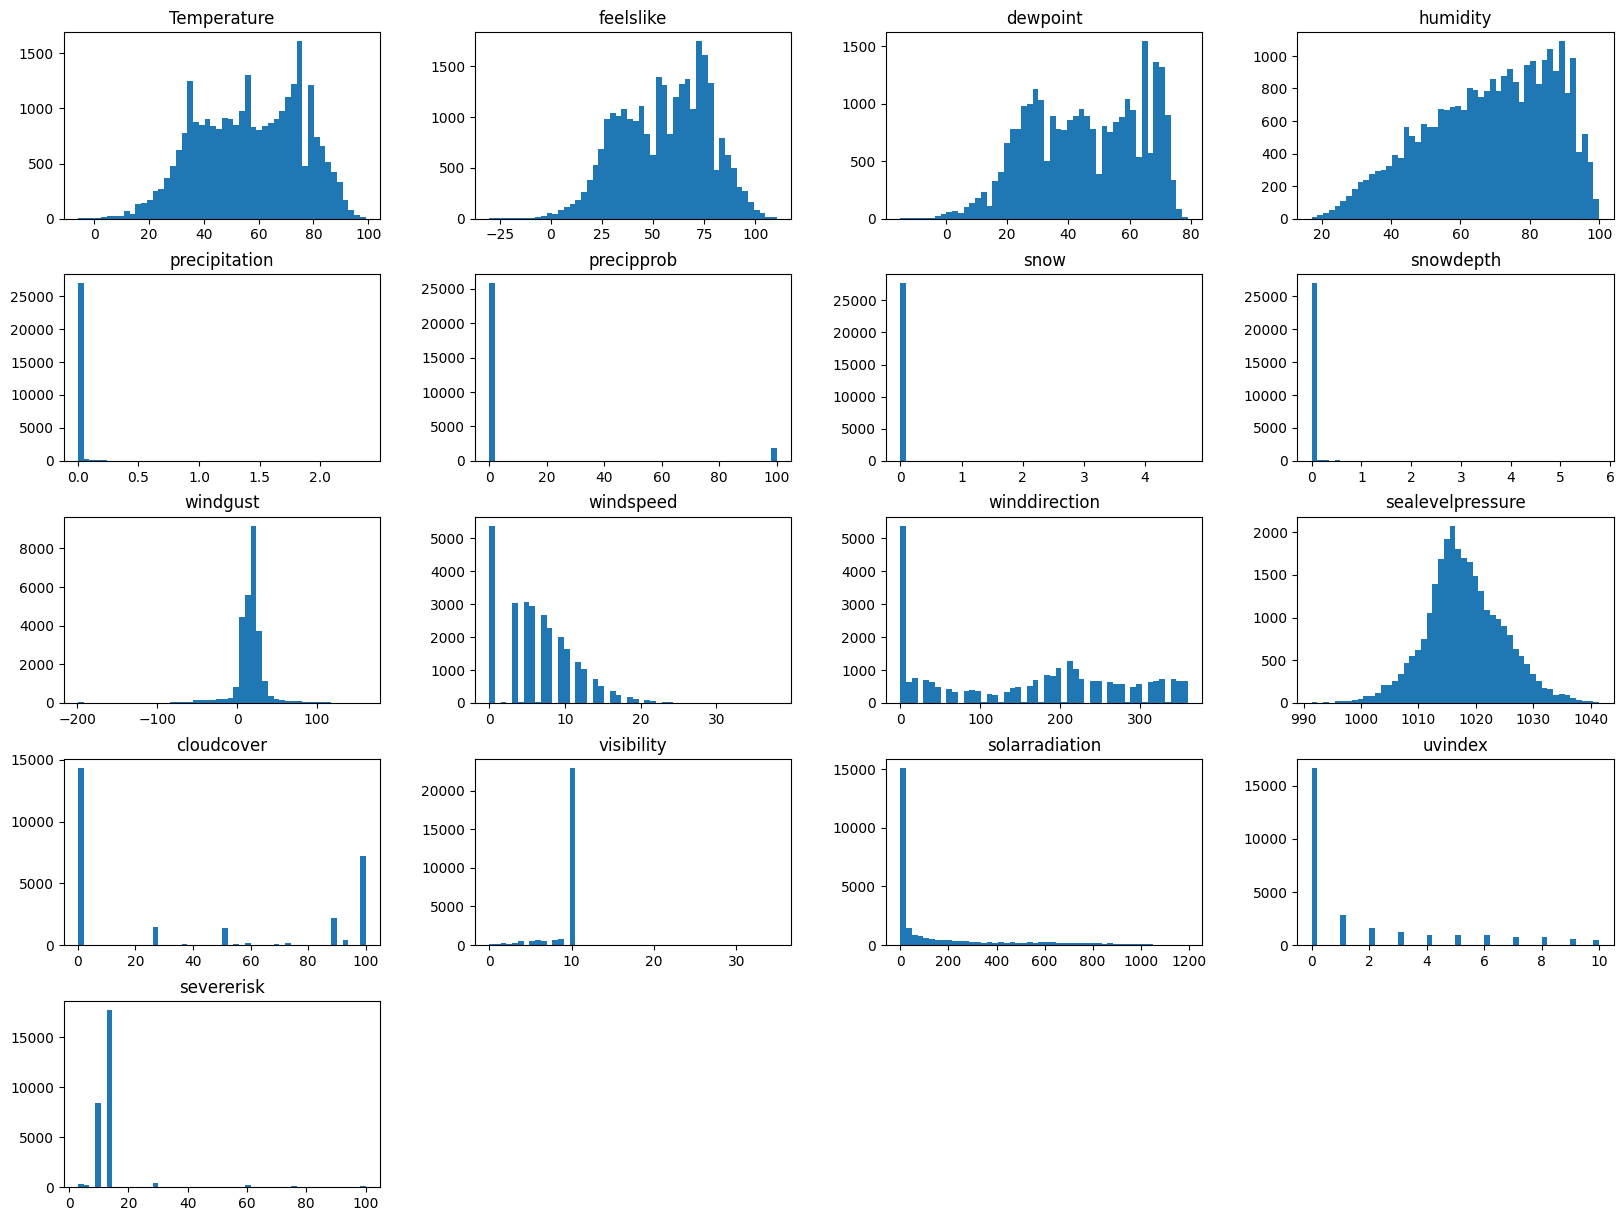

In [21]:
numeric_columns = weather_df.select_dtypes(include=['number'])
numeric_columns.hist(bins=50, figsize=(20, 15), grid=False)
plt.show()

In [22]:
#Trimming to match length:
common_index = demand_df.index.intersection(weather_df.index)
demand_df = demand_df.loc[common_index]
weather_df = weather_df.loc[common_index]

In [23]:
combined_df = pd.merge(demand_df, weather_df, on='datetime')

In [24]:
combined_df.head()

,datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,2020-01-01 00:00:00,445.8,Pokhara,38.0,34.4,29.0,69.76,0.0,0,normal,...,16.100811,4.7,220.0,1015.4,100.0,9.9,0.0,0,13.055957,Overcast
1,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0,normal,...,16.100811,4.7,230.0,1015.3,100.0,9.9,0.0,0,13.055957,Overcast
2,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0,normal,...,16.100811,3.4,230.0,1015.4,100.0,9.9,0.0,0,13.055957,Overcast
3,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0,normal,...,16.100811,4.7,220.0,1015.3,88.9,9.9,0.0,0,13.055957,Partially cloudy
4,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0,normal,...,16.100811,3.4,240.0,1015.2,0.0,9.9,0.0,0,13.055957,Clear


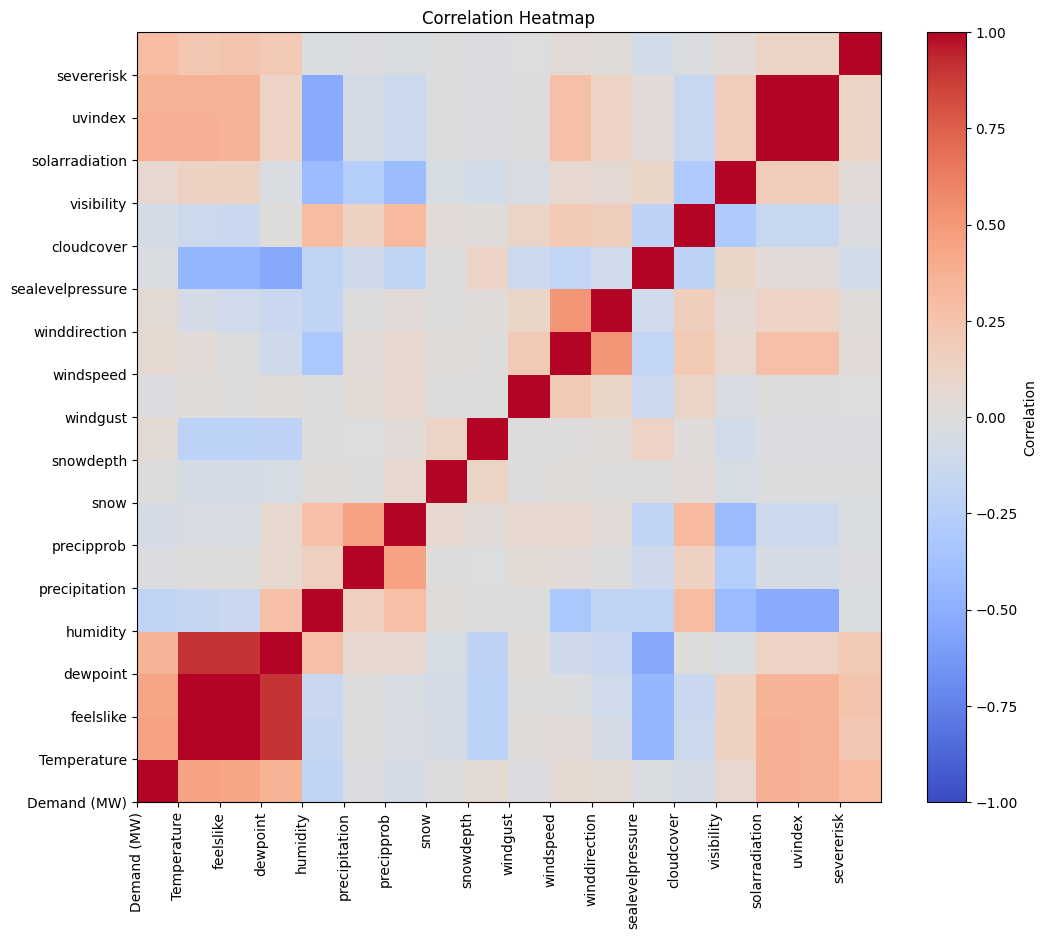

In [25]:
correlation_matrix = combined_df.select_dtypes(include='number').corr()

# Generate a heatmap using Matplotlib
plt.figure(figsize=(12, 10))
heatmap = plt.pcolor(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(heatmap, label='Correlation')

# Set ticks and labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation Heatmap')
plt.show()

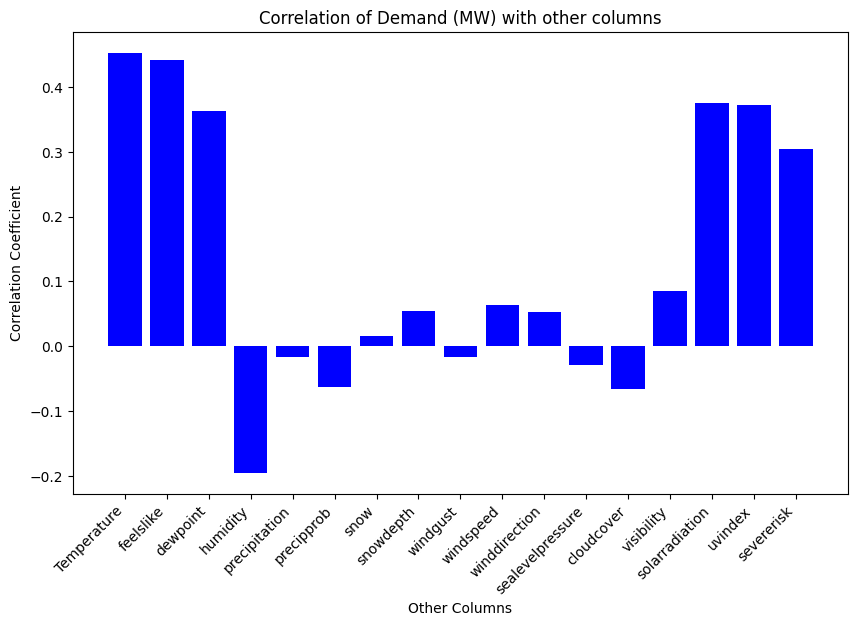

In [26]:
def visualize_column_correlation(df, target_column):
    correlation_matrix = df.corr()

    # Extract correlations of the target_column with other columns
    correlations = correlation_matrix[target_column].drop(target_column)

    # Set up the plotting
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.index, correlations.values, color='blue')

    # Customize the plot
    plt.title(f'Correlation of {target_column} with other columns')
    plt.xlabel('Other Columns')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Example usage:
visualize_column_correlation(combined_df.select_dtypes(include='number'), 'Demand (MW)')

In [27]:
combined_df.head()

,datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,2020-01-01 00:00:00,445.8,Pokhara,38.0,34.4,29.0,69.76,0.0,0,normal,...,16.100811,4.7,220.0,1015.4,100.0,9.9,0.0,0,13.055957,Overcast
1,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0,normal,...,16.100811,4.7,230.0,1015.3,100.0,9.9,0.0,0,13.055957,Overcast
2,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0,normal,...,16.100811,3.4,230.0,1015.4,100.0,9.9,0.0,0,13.055957,Overcast
3,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0,normal,...,16.100811,4.7,220.0,1015.3,88.9,9.9,0.0,0,13.055957,Partially cloudy
4,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0,normal,...,16.100811,3.4,240.0,1015.2,0.0,9.9,0.0,0,13.055957,Clear


# Temperature vs Demand:

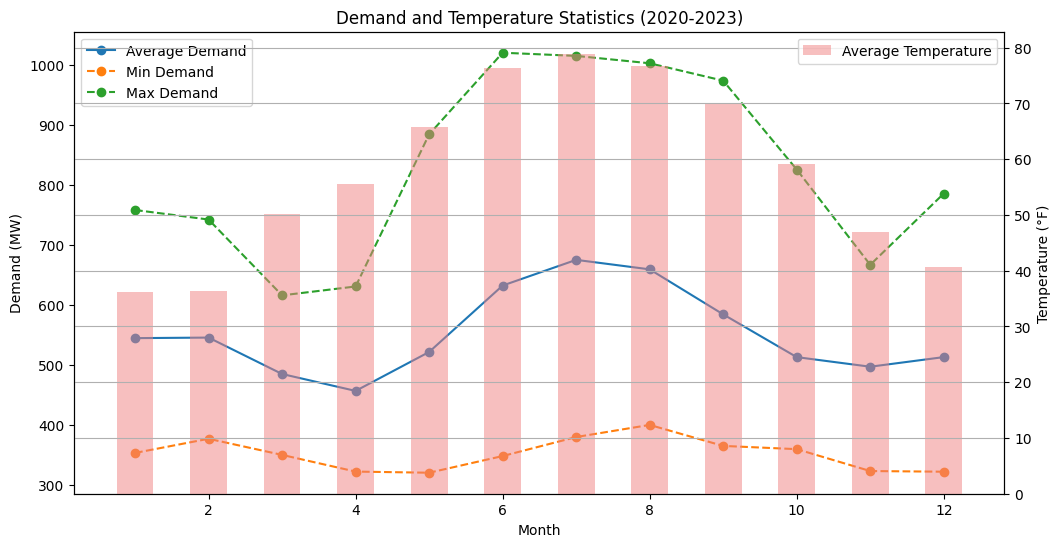

In [28]:
def plot_demand_and_temperature_statistics(start_year, end_year, demand_df, weather_df):
    # Filter demand data for the specified range of years
    filtered_demand_data = demand_df[(demand_df['datetime'].dt.year >= start_year) & (demand_df['datetime'].dt.year <= end_year)]

    # Extract month and year from demand datetime
    filtered_demand_data['Month'] = filtered_demand_data['datetime'].dt.month

    # Calculate minimum, maximum, and average demand per month
    demand_stats = filtered_demand_data.groupby('Month')['Demand (MW)'].agg(['min', 'max', 'mean']).reset_index()

    # Extract month and year from weather datetime
    weather_df['Month'] = weather_df['datetime'].dt.month

    # Calculate average temperature per month
    temperature_stats = weather_df.groupby('Month')['Temperature'].mean().reset_index()

    # Remove the recently added Month column
    weather_df.drop('Month', axis=1, inplace=True)

    # Plotting the demand and temperature statistics
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot demand statistics
    ax1.plot(demand_stats['Month'], demand_stats['mean'], label='Average Demand', marker='o', linestyle='-')
    ax1.plot(demand_stats['Month'], demand_stats['min'], label='Min Demand', marker='o', linestyle='--')
    ax1.plot(demand_stats['Month'], demand_stats['max'], label='Max Demand', marker='o', linestyle='--')

    ax1.set_xlabel('Month')
    ax1.set_ylabel('Demand (MW)')
    ax1.legend(loc='upper left')

    # Create a second y-axis to plot temperature
    ax2 = ax1.twinx()
    ax2.bar(temperature_stats['Month'], temperature_stats['Temperature'], color='lightcoral', alpha=0.5, width=0.5, label='Average Temperature')

    ax2.set_ylabel('Temperature (°F)')
    ax2.legend(loc='upper right')

    plt.title(f'Demand and Temperature Statistics ({start_year}-{end_year})')
    plt.grid(True)
    plt.show()

# Assuming you have a 'datetime' column in both demand_df and weather_df
# Replace 'datetime' with the actual column name if different
start_year = 2020
end_year = 2023
plot_demand_and_temperature_statistics(start_year, end_year, demand_df, weather_df)


# UV vs Demand:

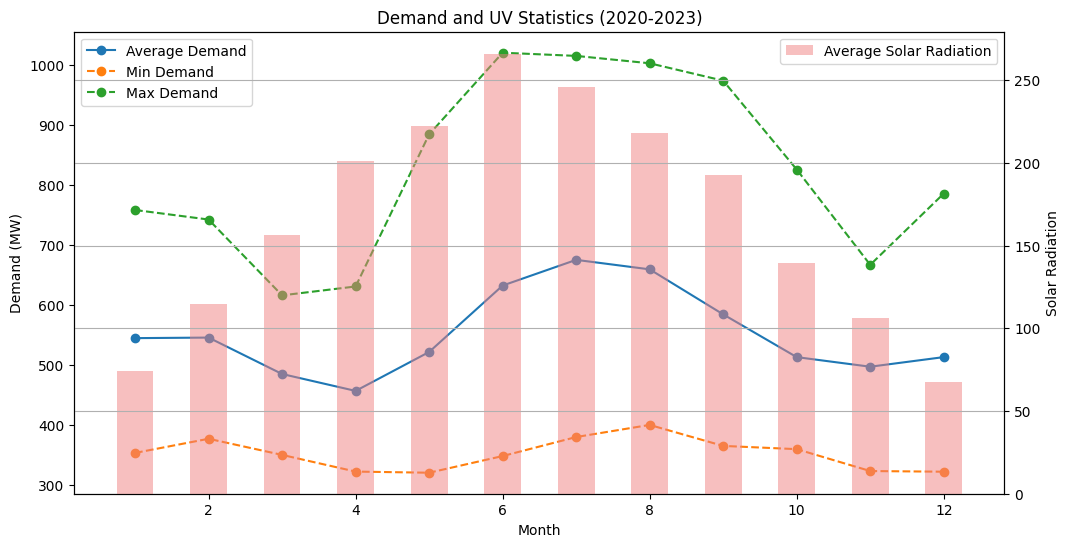

In [29]:
def plot_demand_and_uv_statistics(start_year, end_year, demand_df, weather_df):
    # Filter demand data for the specified range of years
    filtered_demand_data = demand_df[(demand_df['datetime'].dt.year >= start_year) & (demand_df['datetime'].dt.year <= end_year)]

    # Extract month and year from demand datetime
    filtered_demand_data['Month'] = filtered_demand_data['datetime'].dt.month

    # Calculate minimum, maximum, and average demand per month
    demand_stats = filtered_demand_data.groupby('Month')['Demand (MW)'].agg(['min', 'max', 'mean']).reset_index()

    # Extract month and year from weather datetime
    weather_df['Month'] = weather_df['datetime'].dt.month

    # Calculate average temperature per month
    solar_stats = weather_df.groupby('Month')['solarradiation'].mean().reset_index()

    # Remove the recently added Month column
    weather_df.drop('Month', axis=1, inplace=True)

    # Plotting the demand and temperature statistics
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot demand statistics
    ax1.plot(demand_stats['Month'], demand_stats['mean'], label='Average Demand', marker='o', linestyle='-')
    ax1.plot(demand_stats['Month'], demand_stats['min'], label='Min Demand', marker='o', linestyle='--')
    ax1.plot(demand_stats['Month'], demand_stats['max'], label='Max Demand', marker='o', linestyle='--')

    ax1.set_xlabel('Month')
    ax1.set_ylabel('Demand (MW)')
    ax1.legend(loc='upper left')

    # Create a second y-axis to plot temperature
    ax2 = ax1.twinx()
    ax2.bar(solar_stats['Month'], solar_stats['solarradiation'], color='lightcoral', alpha=0.5, width=0.5, label='Average Solar Radiation')

    ax2.set_ylabel('Solar Radiation')
    ax2.legend(loc='upper right')

    plt.title(f'Demand and UV Statistics ({start_year}-{end_year})')
    plt.grid(True)
    plt.show()

# Assuming you have a 'datetime' column in both demand_df and weather_df
# Replace 'datetime' with the actual column name if different
start_year = 2020
end_year = 2023
plot_demand_and_uv_statistics(start_year, end_year, demand_df, weather_df)

# Wind vs Demand:

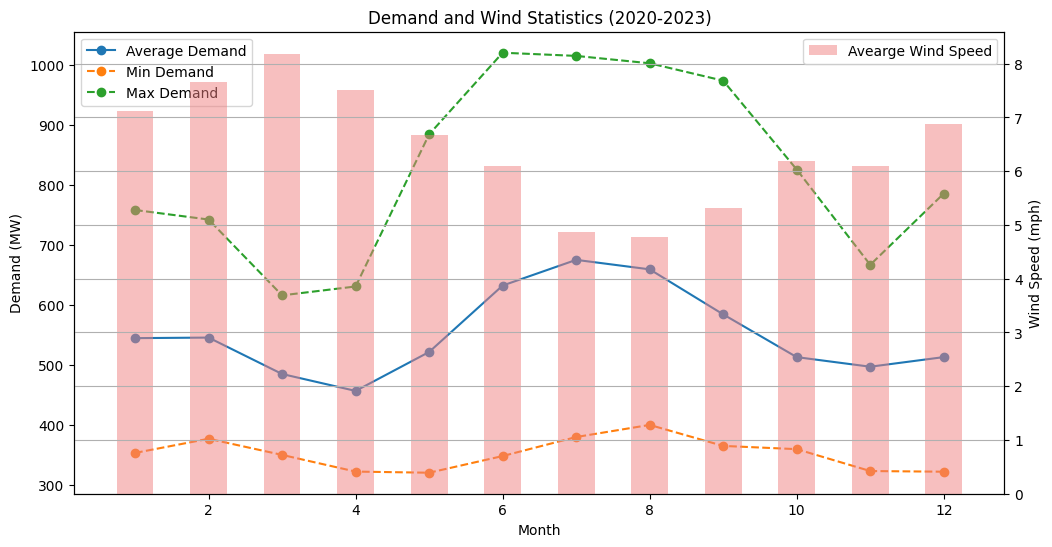

In [30]:
def plot_demand_and_wind_statistics(start_year, end_year, demand_df, weather_df):
    # Filter demand data for the specified range of years
    filtered_demand_data = demand_df[(demand_df['datetime'].dt.year >= start_year) & (demand_df['datetime'].dt.year <= end_year)]

    # Extract month and year from demand datetime
    filtered_demand_data['Month'] = filtered_demand_data['datetime'].dt.month

    # Calculate minimum, maximum, and average demand per month
    demand_stats = filtered_demand_data.groupby('Month')['Demand (MW)'].agg(['min', 'max', 'mean']).reset_index()

    # Extract month and year from weather datetime
    weather_df['Month'] = weather_df['datetime'].dt.month

    # Calculate average temperature per month
    wind_stats = weather_df.groupby('Month')['windspeed'].mean().reset_index()

    # Remove the recently added Month column
    weather_df.drop('Month', axis=1, inplace=True)

    # Plotting the demand and temperature statistics
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot demand statistics
    ax1.plot(demand_stats['Month'], demand_stats['mean'], label='Average Demand', marker='o', linestyle='-')
    ax1.plot(demand_stats['Month'], demand_stats['min'], label='Min Demand', marker='o', linestyle='--')
    ax1.plot(demand_stats['Month'], demand_stats['max'], label='Max Demand', marker='o', linestyle='--')

    ax1.set_xlabel('Month')
    ax1.set_ylabel('Demand (MW)')
    ax1.legend(loc='upper left')

    # Create a second y-axis to plot temperature
    ax2 = ax1.twinx()
    ax2.bar(wind_stats['Month'], wind_stats['windspeed'], color='lightcoral', alpha=0.5, width=0.5, label='Avearge Wind Speed')

    ax2.set_ylabel('Wind Speed (mph)')
    ax2.legend(loc='upper right')

    plt.title(f'Demand and Wind Statistics ({start_year}-{end_year})')
    plt.grid(True)
    plt.show()

# Assuming you have a 'datetime' column in both demand_df and weather_df
# Replace 'datetime' with the actual column name if different
start_year = 2020
end_year = 2023
plot_demand_and_wind_statistics(start_year, end_year, demand_df, weather_df)


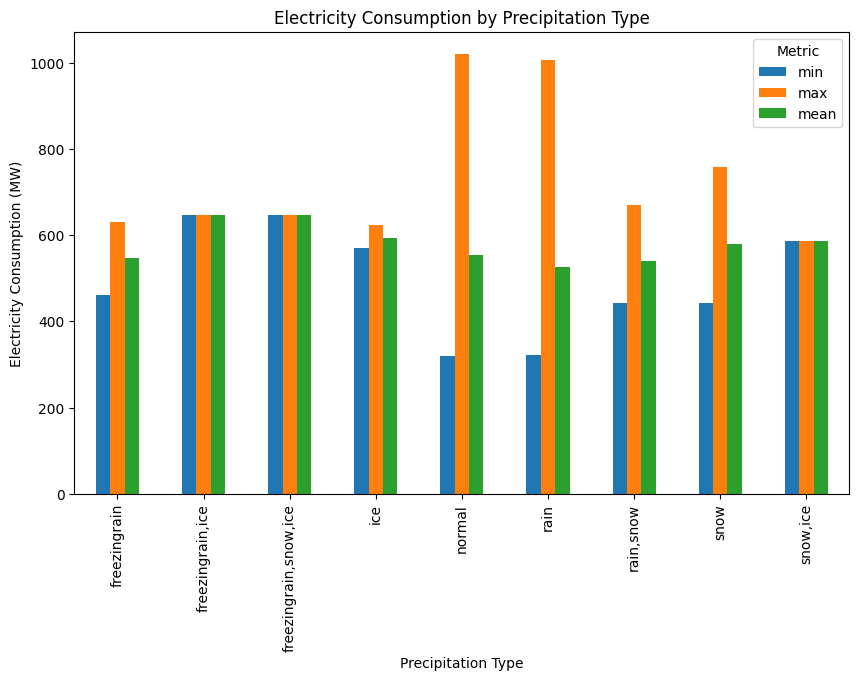

In [31]:
def plot_demand_and_precip_statistics(demand_df, weather_df):

    merged_df = pd.merge(demand_df, weather_df, left_index=True, right_index=True)

    # Group by 'preciptype' and calculate min, max, and average electricity consumption
    grouped_data = merged_df.groupby('preciptype')['Demand (MW)'].agg(['min', 'max', 'mean'])

    # Plot the data
    grouped_data.plot(kind='bar', y=['min', 'max', 'mean'], figsize=(10, 6))
    plt.title('Electricity Consumption by Precipitation Type')
    plt.xlabel('Precipitation Type')
    plt.ylabel('Electricity Consumption (MW)')
    plt.legend(title='Metric')
    plt.show()

plot_demand_and_precip_statistics(demand_df, weather_df)

# Severeindex

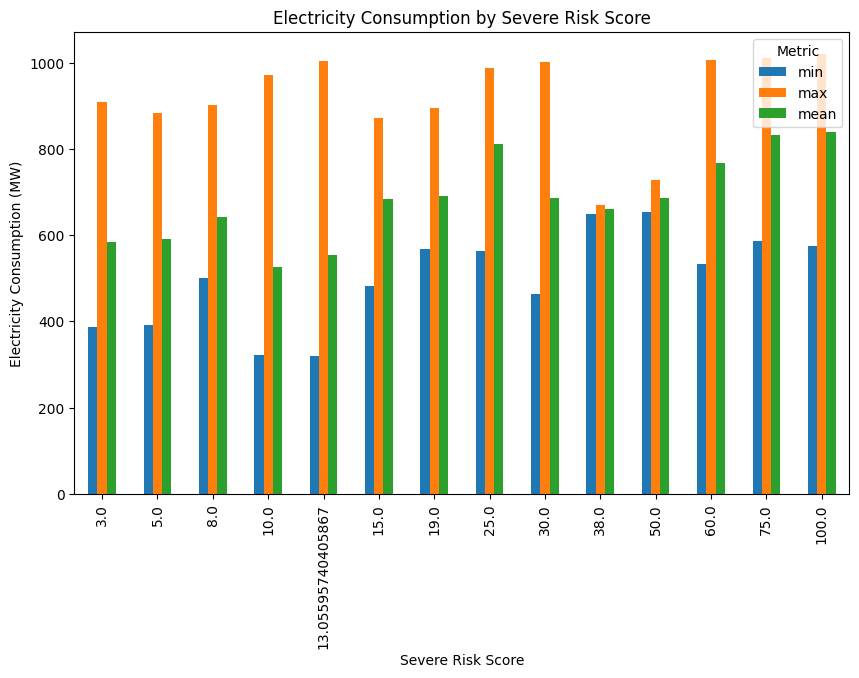

In [32]:
def plot_demand_and_severe_statistics(demand_df, weather_df):

    merged_df = pd.merge(demand_df, weather_df, left_index=True, right_index=True)

    # Group by 'preciptype' and calculate min, max, and average electricity consumption
    grouped_data = merged_df.groupby('severerisk')['Demand (MW)'].agg(['min', 'max', 'mean'])

    # Plot the data
    grouped_data.plot(kind='bar', y=['min', 'max', 'mean'], figsize=(10, 6))
    plt.title('Electricity Consumption by Severe Risk Score')
    plt.xlabel('Severe Risk Score')
    plt.ylabel('Electricity Consumption (MW)')
    plt.legend(title='Metric')
    plt.show()

plot_demand_and_severe_statistics(demand_df, weather_df)

# Autocorrelation

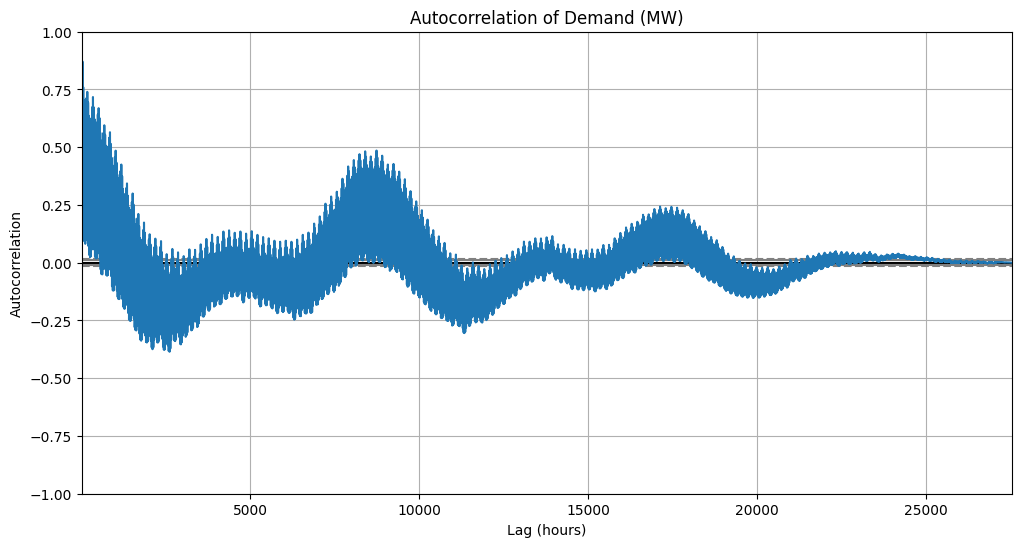

In [33]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(demand_df['Demand (MW)'])
plt.title('Autocorrelation of Demand (MW)')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.show()

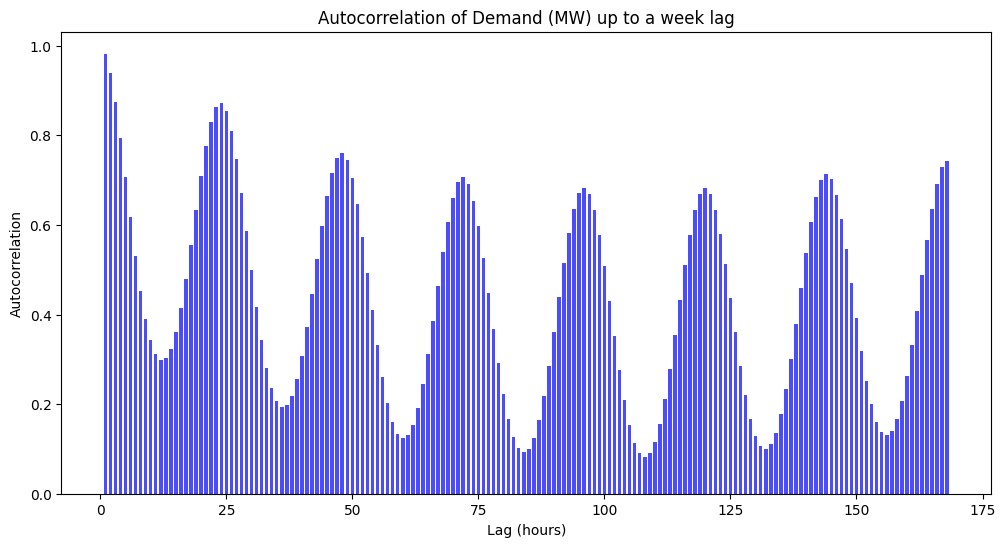

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a datetime index for time series data
demand_df.index = pd.to_datetime(demand_df.index)

# Calculate autocorrelation for the 'Demand (MW)' column up to lag 24 hours
max_lag = 24*7
autocorrelation = [demand_df['Demand (MW)'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Plot autocorrelation
plt.figure(figsize=(12, 6))
plt.bar(range(1, max_lag + 1), autocorrelation, width=0.7, color='blue', alpha=0.7)
plt.title('Autocorrelation of Demand (MW) up to a week lag')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')

# plt.xticks(range(1, max_lag + 1, 24))
plt.show()


# Prices

In [32]:
prices = 'Documents and Data for forecasting LOCUS/Price forecasting/Price Forecasting data upto December 24.csv'

In [33]:
prices_df = pd.read_csv(prices)

In [34]:
prices_df['Delivery Day'] = pd.to_datetime(prices_df['Delivery Day'], format='%m/%d/%Y')

In [35]:
prices_df.head()

,Delivery Day,Hours,Prices\n(EUR/MWh)
0,2020-01-01,H1,26.38
1,2020-01-01,H2,26.50
2,2020-01-01,H3,27.01
3,2020-01-01,H4,27.40
4,2020-01-01,H5,27.99


In [36]:
prices_df.describe()

,Delivery Day,Prices\n(EUR/MWh)
count,34896,34896.000000
mean,2021-12-27 12:00:00,132.958000
min,2020-01-01 00:00:00,-35.000000
25%,2020-12-29 00:00:00,47.987500
50%,2021-12-27 12:00:00,95.440000
75%,2022-12-26 00:00:00,179.237500
max,2023-12-24 00:00:00,1047.100000
std,NaN,120.249844


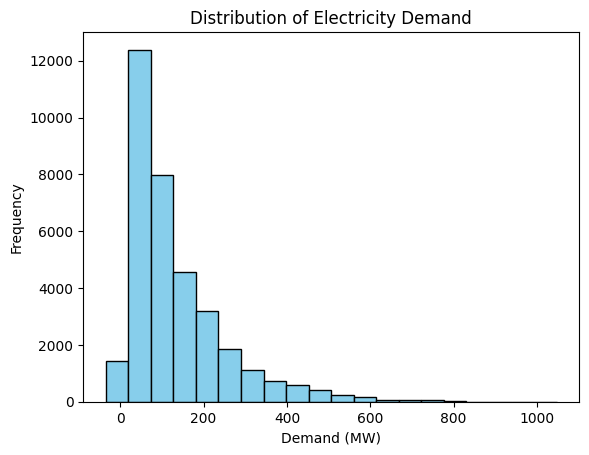

In [46]:
price_values = prices_df['Prices\n(EUR/MWh)']


# Plotting the histogram
plt.hist(price_values, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Electricity Demand')
plt.xlabel('Demand (MW)')
plt.ylabel('Frequency')
plt.show()

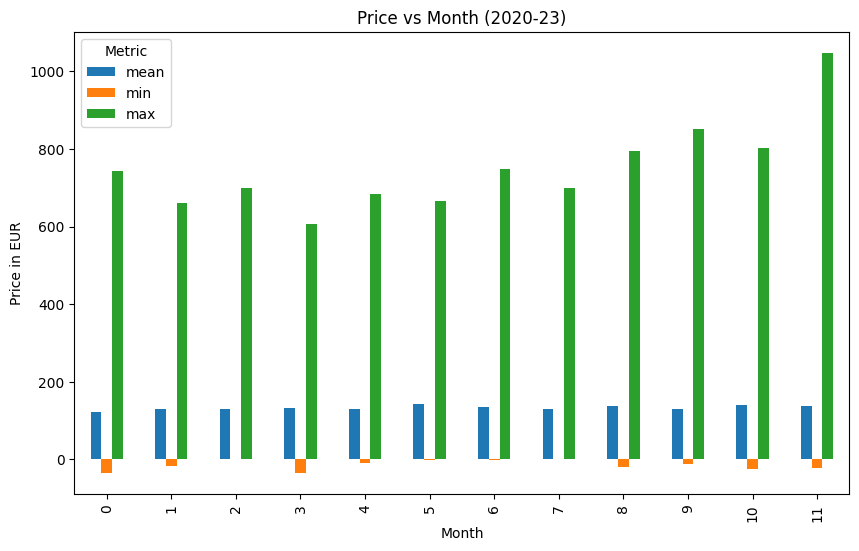

In [37]:
prices_df['Delivery Day'] = pd.to_datetime(prices_df['Delivery Day'])
prices_df['Month'] = prices_df['Delivery Day'].dt.month
price_df_monthly = prices_df.groupby("Month")["Prices\n(EUR/MWh)"].agg(['min', 'max', 'mean']).reset_index()
price_df_monthly.plot(kind='bar', y = ['mean','min', 'max'], figsize=(10,6))
plt.title('Price vs Month (2020-23)')
plt.xlabel('Month')
plt.ylabel('Price in EUR')
plt.legend(title='Metric')
plt.show()


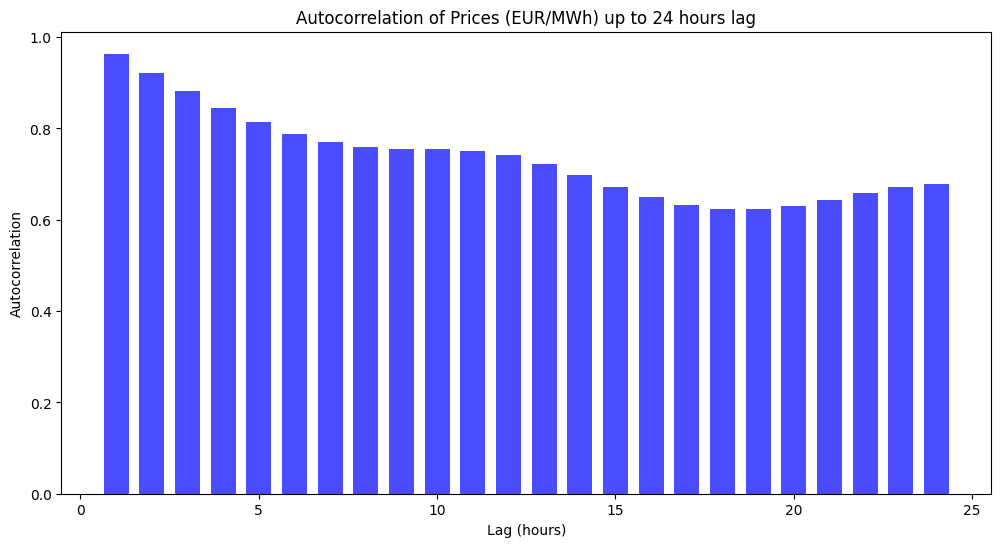

In [44]:
# Calculate autocorrelation for the 'Prices (EUR/MWh)' column up to lag 24 hours
max_lag = 24
autocorrelation = [prices_df['Prices\n(EUR/MWh)'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Plot autocorrelation
plt.figure(figsize=(12, 6))
plt.bar(range(1, max_lag + 1), autocorrelation, width=0.7, color='blue', alpha=0.7)
plt.title('Autocorrelation of Prices (EUR/MWh) up to 24 hours lag')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')

# plt.xticks(range(1, max_lag + 1, 24))
plt.show()

/home/mk/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mk/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mk/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


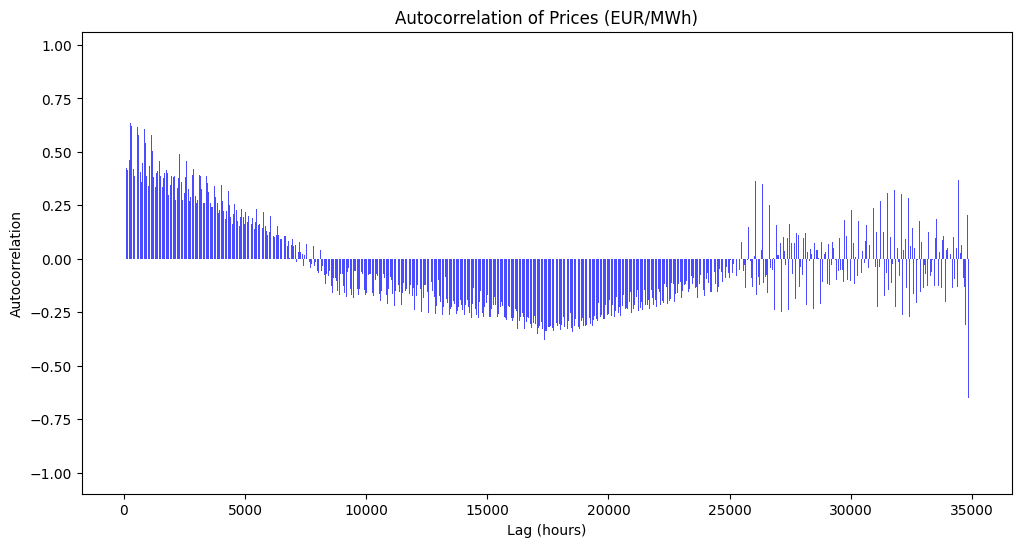

In [45]:
# Calculate autocorrelation for the 'Prices (EUR/MWh)'
max_lag = len(prices_df)
autocorrelation = [prices_df['Prices\n(EUR/MWh)'].autocorr(lag=i) for i in range(1, max_lag + 1)]

# Plot autocorrelation
plt.figure(figsize=(12, 6))
plt.bar(range(1, max_lag + 1), autocorrelation, width=0.7, color='blue', alpha=0.7)
plt.title('Autocorrelation of Prices (EUR/MWh)')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')

# plt.xticks(range(1, max_lag + 1, 24))
plt.show()